In [4]:
from pandas import read_csv
import pandas as pd

In [5]:
# from https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05
# data = read_csv('data/demo_r_mwk_05_1_Data.csv')
data = read_csv('data/demo_r_mwk_05__custom_4646510_linear.csv', na_values=':')


In [6]:
short_to_long_name = {'TOTAL': 'Total',
                        'UNK': 'Unknown',
                        'Y_LT5' : 'Less than 5 years',
                        'Y5-9'  : 'From 5 to 9 years',
                        'Y10-14' : 'From 10 to 14 years',
                        'Y15-19' : 'From 15 to 19 years',
                        'Y20-24' : 'From 20 to 24 years',
                        'Y25-29' : 'From 25 to 29 years',
                        'Y30-34' : 'From 30 to 34 years',
                        'Y35-39' : 'From 35 to 39 years',
                        'Y40-44' : 'From 40 to 44 years',
                        'Y45-49' : 'From 45 to 49 years',
                        'Y50-54' : 'From 50 to 54 years',
                        'Y55-59' : 'From 55 to 59 years',
                        'Y60-64' : 'From 60 to 64 years',
                        'Y65-69' : 'From 65 to 69 years',
                        'Y70-74' : 'From 70 to 74 years',
                        'Y75-79' : 'From 75 to 79 years',
                        'Y80-84' : 'From 80 to 84 years',
                        'Y85-89' : 'From 85 to 89 years',
                        'Y_GE90' : '90 years or over'}


data['Value'] = data['OBS_VALUE'].map(lambda x: int(str(x).replace(',', '')) if pd.notnull(x) else x)
data['AGE'] = data['age'].map(lambda x: short_to_long_name[x] if x in short_to_long_name else x)
data['SEX'] = data['sex'].map(lambda x: 'Total' if x == 'T' else x)
data['TIME'] = data['TIME_PERIOD'].map(lambda x: x.replace('-', ''))


In [7]:
data

,DATAFLOW,LAST UPDATE,freq,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Value,AGE,SEX,TIME
0,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W01,1069,NaN,1069,Total,Total,2000W01
1,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,UNK,T,NR,HR,2000-W01,0,NaN,0,Unknown,Total,2000W01
2,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y10-14,T,NR,HR,2000-W01,1,NaN,1,From 10 to 14 years,Total,2000W01
3,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y15-19,T,NR,HR,2000-W01,4,NaN,4,From 15 to 19 years,Total,2000W01
4,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y20-24,T,NR,HR,2000-W01,1,NaN,1,From 20 to 24 years,Total,2000W01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25111,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y75-79,T,NR,HR,2022-W48,108,p,108,From 75 to 79 years,Total,2022W48
25112,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y80-84,T,NR,HR,2022-W48,177,p,177,From 80 to 84 years,Total,2022W48
25113,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y85-89,T,NR,HR,2022-W48,184,p,184,From 85 to 89 years,Total,2022W48
25114,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y_GE90,T,NR,HR,2022-W48,143,p,143,90 years or over,Total,2022W48


In [8]:
age_groups = sorted(set(data.AGE.to_list()))
age_groups

['90 years or over',
 'From 10 to 14 years',
 'From 15 to 19 years',
 'From 20 to 24 years',
 'From 25 to 29 years',
 'From 30 to 34 years',
 'From 35 to 39 years',
 'From 40 to 44 years',
 'From 45 to 49 years',
 'From 5 to 9 years',
 'From 50 to 54 years',
 'From 55 to 59 years',
 'From 60 to 64 years',
 'From 65 to 69 years',
 'From 70 to 74 years',
 'From 75 to 79 years',
 'From 80 to 84 years',
 'From 85 to 89 years',
 'Less than 5 years',
 'Total',
 'Unknown']

In [9]:
sorted_age_groups = [age_groups[18], age_groups[9]] + age_groups[1:9] + age_groups[10:18] + [age_groups[0], age_groups[19]]

In [10]:
sorted_age_groups

['Less than 5 years',
 'From 5 to 9 years',
 'From 10 to 14 years',
 'From 15 to 19 years',
 'From 20 to 24 years',
 'From 25 to 29 years',
 'From 30 to 34 years',
 'From 35 to 39 years',
 'From 40 to 44 years',
 'From 45 to 49 years',
 'From 50 to 54 years',
 'From 55 to 59 years',
 'From 60 to 64 years',
 'From 65 to 69 years',
 'From 70 to 74 years',
 'From 75 to 79 years',
 'From 80 to 84 years',
 'From 85 to 89 years',
 '90 years or over',
 'Total']

In [11]:
sorted_age_groups = ['Less than 5 years',
 'From 5 to 9 years',
 'From 10 to 14 years',
 'From 15 to 19 years',
 'From 20 to 24 years',
 'From 25 to 29 years',
 'From 30 to 34 years',
 'From 35 to 39 years',
 'From 40 to 44 years',
 'From 45 to 49 years',
 'From 50 to 54 years',
 'From 55 to 59 years',
 'From 60 to 64 years',
 'From 65 to 69 years',
 'From 70 to 74 years',
 'From 75 to 79 years',
 'From 80 to 84 years',
 'From 85 to 89 years',
 '90 years or over',
 'Total']

In [12]:
data_all_age = data[(data.AGE == 'Total') & (data.SEX == 'Total')]

In [13]:
data_all_age

,DATAFLOW,LAST UPDATE,freq,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Value,AGE,SEX,TIME
0,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W01,1069,NaN,1069,Total,Total,2000W01
21,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W02,1160,NaN,1160,Total,Total,2000W02
42,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W03,1164,NaN,1164,Total,Total,2000W03
63,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W04,1270,NaN,1270,Total,Total,2000W04
84,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2000-W05,1328,NaN,1328,Total,Total,2000W05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2022-W44,965,p,965,Total,Total,2022W44
25032,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2022-W45,1015,p,1015,Total,Total,2022W45
25053,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2022-W46,973,p,973,Total,Total,2022W46
25074,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2022-W47,1023,p,1023,Total,Total,2022W47


In [14]:
data_all_age_2015_2019 = data_all_age[(data_all_age.TIME >= '2015W01') & (data_all_age.TIME < '2020W01')]

In [15]:
data_all_age_2015_2019

,DATAFLOW,LAST UPDATE,freq,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Value,AGE,SEX,TIME
16422,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2015-W01,1177,NaN,1177,Total,Total,2015W01
16443,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2015-W02,1254,NaN,1254,Total,Total,2015W02
16464,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2015-W03,1276,NaN,1276,Total,Total,2015W03
16485,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2015-W04,1231,NaN,1231,Total,Total,2015W04
16506,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2015-W05,1215,NaN,1215,Total,Total,2015W05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21798,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2019-W48,915,NaN,915,Total,Total,2019W48
21819,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2019-W49,989,NaN,989,Total,Total,2019W49
21840,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2019-W50,1021,NaN,1021,Total,Total,2019W50
21861,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,TOTAL,T,NR,HR,2019-W51,1048,NaN,1048,Total,Total,2019W51


In [16]:
data_all_age_2020 = data_all_age[(data_all_age.TIME >= '2020W01') & (data_all_age.TIME < '2021W01')]
data_all_age_2021 = data_all_age[(data_all_age.TIME >= '2021W01') & (data_all_age.TIME < '2022W01')]
data_all_age_2022 = data_all_age[(data_all_age.TIME >= '2022W01') & (data_all_age.TIME < '2023W01')]

In [18]:
import numpy as np

week_avgs = []
week_stds = []

totals = []

for week in range(1, 53):
    current_week = data_all_age_2015_2019[data_all_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    
    current_vals = np.asarray([int(str(x).replace(',', '')) for x in current_week.Value.to_list()])
    
    print(current_vals)
    
    if week == 1:
        totals = current_vals
    else:
        totals += current_vals
    
    week_avgs.append(current_vals.mean())
    week_stds.append(current_vals.std())
    
week_avgs = np.asarray(week_avgs)
week_stds = np.asarray(week_stds)

total_avg = np.asarray(totals).mean()
total_std = np.asarray(totals).std()

print(total_avg)
print(total_std)

[1177 1115 1465 1128 1154]
[1254 1032 1621 1165 1220]
[1276 1074 1475 1203 1238]
[1231 1114 1369 1137 1319]
[1215 1024 1304 1146 1286]
[1287 1063 1164 1154 1133]
[1306  989 1118 1157 1126]
[1301  980 1072 1134 1093]
[1239  987 1104 1225 1031]
[1215 1047  983 1266 1130]
[1208 1034 1035 1165 1018]
[1232 1008 1038 1072  970]
[1085 1086  969 1061  987]
[1137 1003  995 1065 1032]
[1078  966  970 1007  958]
[1026  931  996  947  914]
[1041  940 1025 1028 1033]
[1019 1005  999  878  947]
[1011  912  925  935  958]
[926 987 931 919 943]
[ 947 1003  894  930  952]
[855 963 984 950 893]
[ 998  903  906  917 1024]
[1000  906  857  901 1040]
[ 875  975 1004  845  909]
[880 906 933 884 960]
[996 874 973 985 930]
[1010  910 1010  947  870]
[1049  904  979  911  933]
[1230  942  863  916  985]
[ 918  874 1106 1044  865]
[1040  804 1022 1030  892]
[1066  930  850  956  884]
[827 951 876 939 928]
[929 911 917 879 939]
[911 897 875 918 831]
[909 903 862 929 893]
[1057  876  918  926  875]
[ 891 1008  96

In [20]:
per_week_2020 = []
per_week_2021 = []
per_week_2022 = []


for week in range(1, 53):
    current_week_2020 = data_all_age_2020[data_all_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    current_week_2021 = data_all_age_2021[data_all_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    current_week_2022 = data_all_age_2022[data_all_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    
    per_week_2020.append(int(str(current_week_2020.Value.iat[0]).replace(',', '')))
    per_week_2021.append(int(str(current_week_2021.Value.iat[0]).replace(',', '')))
        
    try:
        per_week_2022.append(int(str(current_week_2022.Value.iat[0]).replace(',', '')))
    except:
        pass
    

total_2020 = sum(per_week_2020)
total_2021 = sum(per_week_2021)

In [21]:
(total_2020 - total_avg) / total_std

3.691212702752156

In [22]:
(total_2021 - total_avg) / total_std

9.64805310900797

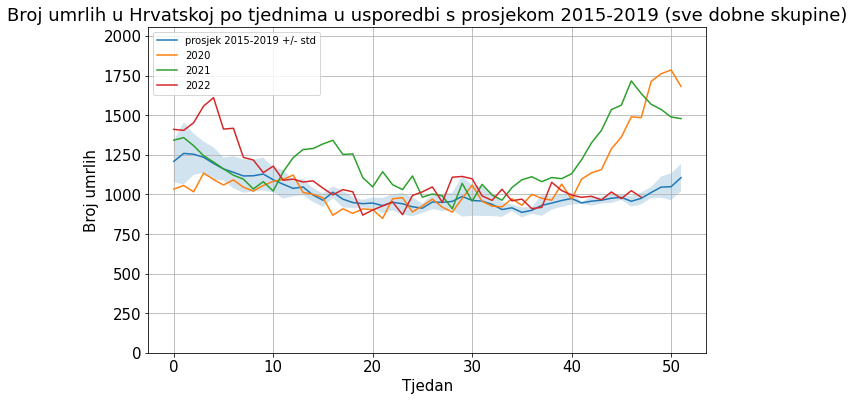

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt


plt.rc('font', size=15) 
plt.rc('legend',fontsize=10)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(week_avgs, label='prosjek 2015-2019 +/- std')
ax.fill_between(range(len(week_avgs)), week_avgs - week_stds, week_avgs + week_stds, alpha=0.2)

ax.plot(per_week_2020, label='2020')
ax.plot(per_week_2021, label='2021')
ax.plot(per_week_2022, label='2022')

ax.set_ylim(0, max(week_avgs) + 800)
ax.grid('on')

ax.set_ylabel('Broj umrlih')
ax.set_xlabel('Tjedan')

ax.set_title('Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom 2015-2019 (sve dobne skupine)')
ax.legend()

plt.savefig('img/cro_excess.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()

<ipython-input-27-f76ec42eee07>:53: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].fill_between(range(len(week_avgs)), - week_stds / week_stds,  week_stds / week_stds, alpha=0.2)
<ipython-input-27-f76ec42eee07>:55: RuntimeWarning: divide by zero encountered in true_divide
  axs[r, c].plot(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
<ipython-input-27-f76ec42eee07>:55: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].plot(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
<ipython-input-27-f76ec42eee07>:56: RuntimeWarning: divide by zero encountered in true_divide
  axs[r, c].plot(range(len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
<ipython-input-27-f76ec42eee07>:56: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].plot(range(len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
<ipython-input-27-f76ec42eee0

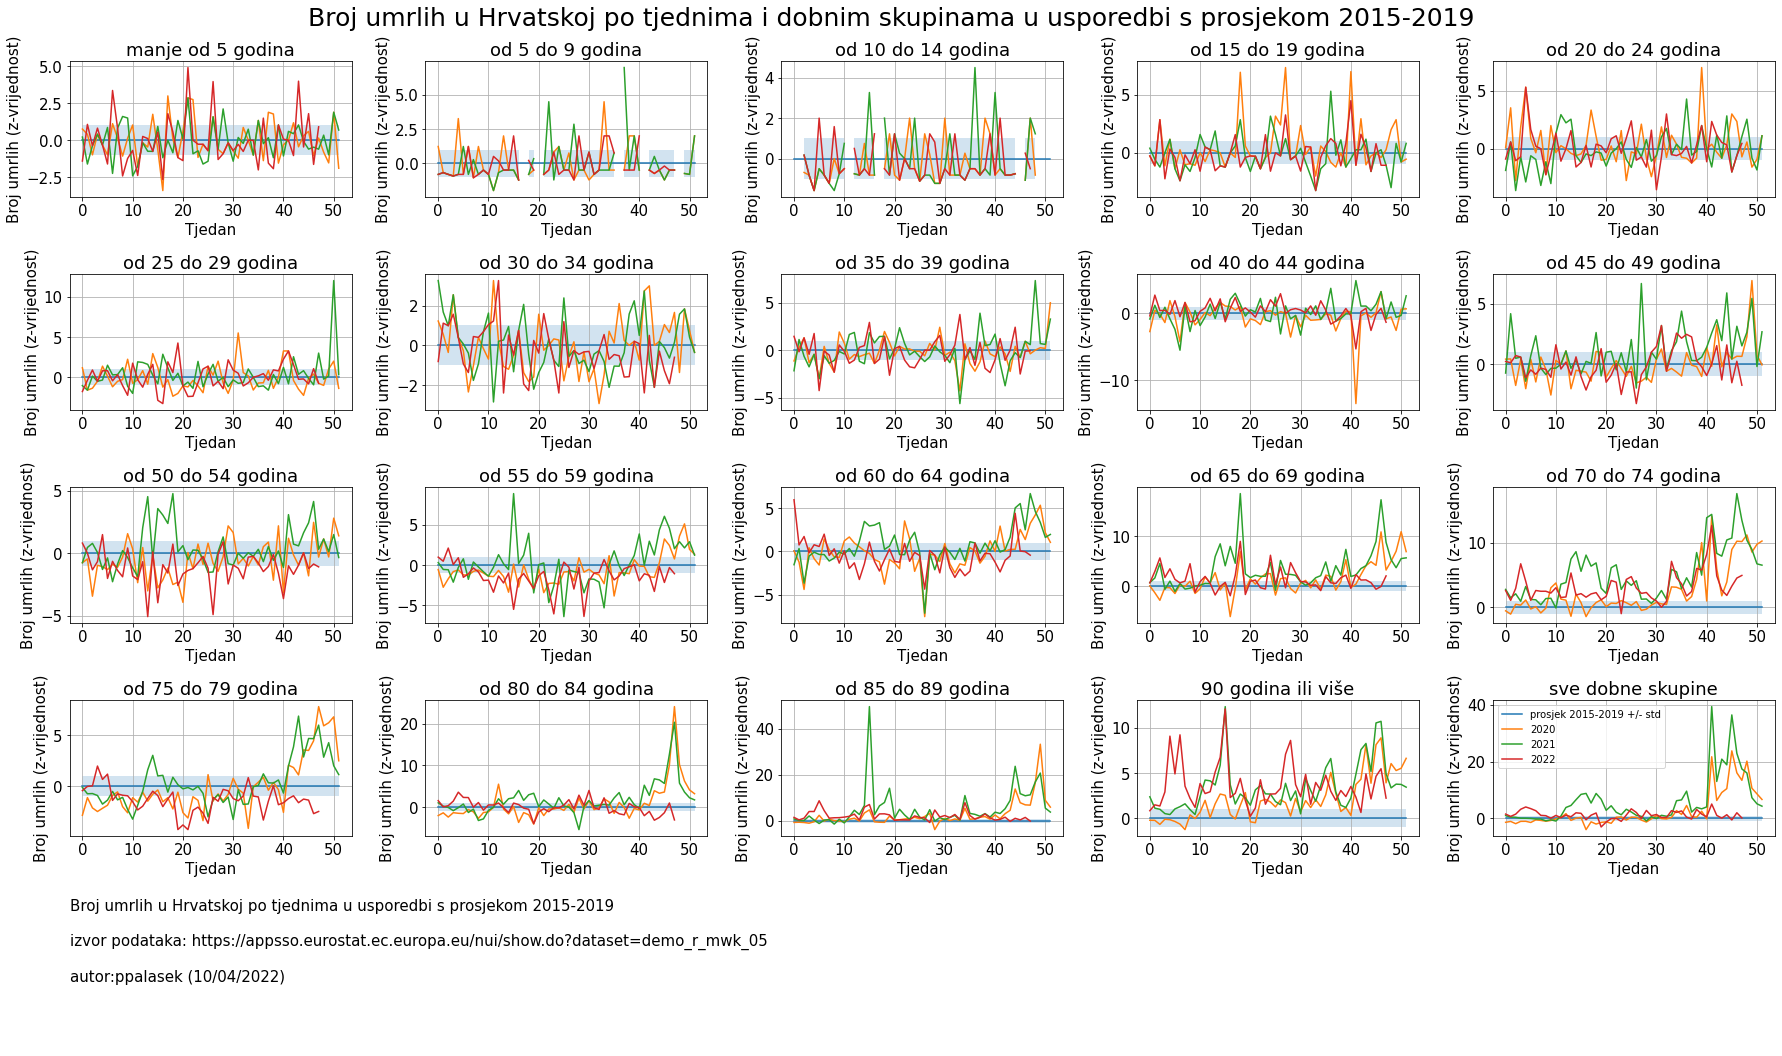

In [27]:
fig, axs = plt.subplots(5, 5, figsize=(25, 15))

gs = axs[4, 0].get_gridspec()

for i, age_group in enumerate(sorted_age_groups):
    r = i // 5
    c = i % 5
    
    age_group_hr = age_group.replace('From', 'od').replace('to', 'do').replace('years', 'godina').replace('or over', 'ili više').replace('Less than', 'manje od').replace('Total', 'sve dobne skupine')

    data_current_age = data[(data.AGE == age_group) & (data.SEX == 'Total')]
    
    data_current_age_2015_2019 = data_current_age[(data_current_age.TIME >= '2015W01') & (data_current_age.TIME < '2020W01')]
    
    data_current_age_2020 = data_current_age[(data_current_age.TIME >= '2020W01') & (data_current_age.TIME < '2021W01')]
    data_current_age_2021 = data_current_age[(data_current_age.TIME >= '2021W01') & (data_current_age.TIME < '2022W01')]
    data_current_age_2022 = data_current_age[(data_current_age.TIME >= '2022W01') & (data_current_age.TIME < '2023W01')]
    
    week_avgs = []
    week_stds = []

    for week in range(1, 53):
        current_week = data_current_age_2015_2019[data_current_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        current_vals = np.asarray([int(str(x).replace(',', '')) for x in current_week.Value.to_list()])

        week_avgs.append(current_vals.mean())
        week_stds.append(current_vals.std())

    week_avgs = np.asarray(week_avgs)
    week_stds = np.asarray(week_stds)
    
    per_week_2020 = []
    per_week_2021 = []
    per_week_2022 = []

    for week in range(1, 53):
        current_week_2020 = data_current_age_2020[data_current_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2021 = data_current_age_2021[data_current_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2022 = data_current_age_2022[data_current_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        per_week_2020.append(int(str(current_week_2020.Value.iat[0]).replace(',', '')))
        per_week_2021.append(int(str(current_week_2021.Value.iat[0]).replace(',', '')))

        try:
            per_week_2022.append(int(str(current_week_2022.Value.iat[0]).replace(',', '')))
        except:
            pass
    
    

    axs[r, c].plot(week_avgs - week_avgs, label='prosjek 2015-2019 +/- std')
    axs[r, c].fill_between(range(len(week_avgs)), - week_stds / week_stds,  week_stds / week_stds, alpha=0.2)

    axs[r, c].plot(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
    axs[r, c].plot(range(len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
    axs[r, c].plot(range(len(per_week_2022)), (per_week_2022 - week_avgs[:len(per_week_2022)]) / week_stds[:len(per_week_2022)], label='2022')

    axs[r, c].grid('on')

    axs[r, c].set_ylabel('Broj umrlih (z-vrijednost)')
    axs[r, c].set_xlabel('Tjedan')

    axs[r, c].set_title(age_group_hr)
    
    
    
axs[r, c].legend()

for ax in axs[-1, :]:
    ax.remove()
    
plt.suptitle('Broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015-2019', fontsize=25)

ax_text = fig.add_subplot(gs[4, :])

ax_text.text(0, 0.5, 'Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom 2015-2019\n\nizvor podataka: https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05\n\nautor:ppalasek (10/04/2022)')
ax_text.axis('off')


plt.tight_layout()
plt.savefig('img/cro_excess_all_z_score.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()

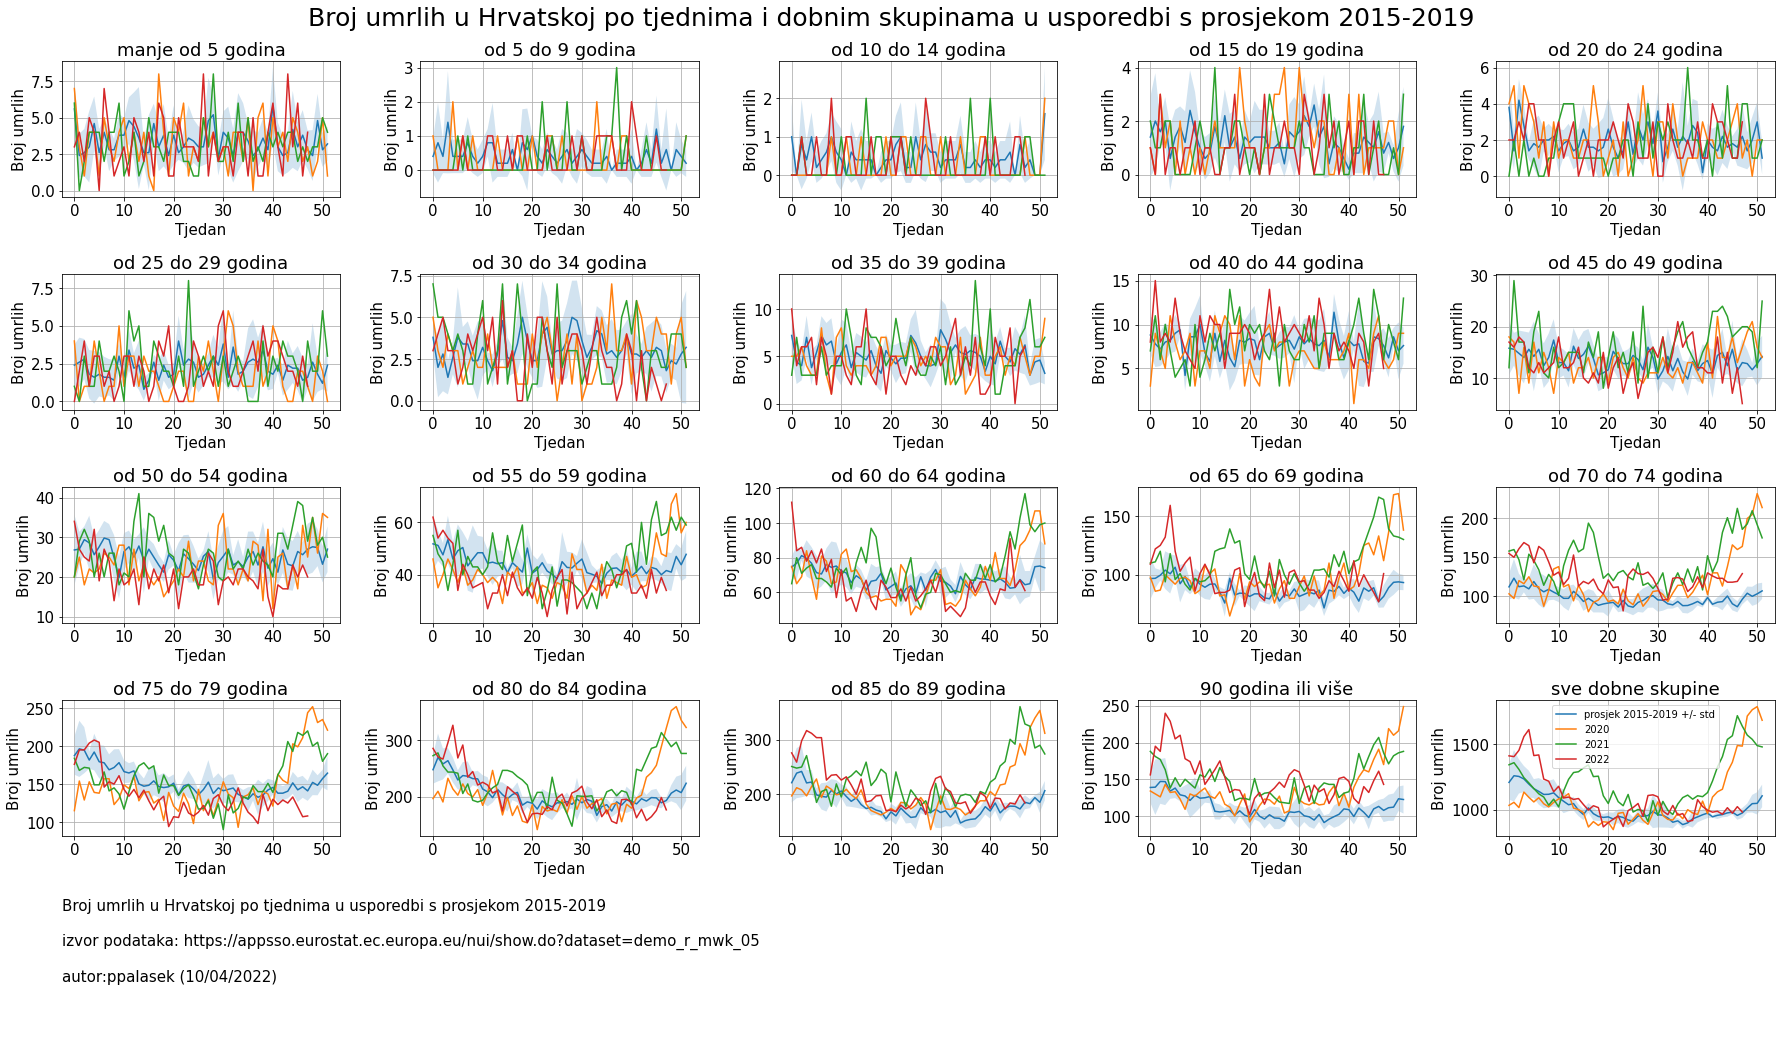

In [29]:
fig, axs = plt.subplots(5, 5, figsize=(25, 15))

gs = axs[4, 0].get_gridspec()


for i, age_group in enumerate(sorted_age_groups):
    r = i // 5
    c = i % 5
    
    age_group_hr = age_group.replace('From', 'od').replace('to', 'do').replace('years', 'godina').replace('or over', 'ili više').replace('Less than', 'manje od').replace('Total', 'sve dobne skupine')

    data_current_age = data[(data.AGE == age_group) & (data.SEX == 'Total')]
    
    data_current_age_2015_2019 = data_current_age[(data_current_age.TIME >= '2015W01') & (data_current_age.TIME < '2020W01')]
    
    data_current_age_2020 = data_current_age[(data_current_age.TIME >= '2020W01') & (data_current_age.TIME < '2021W01')]
    data_current_age_2021 = data_current_age[(data_current_age.TIME >= '2021W01') & (data_current_age.TIME < '2022W01')]
    data_current_age_2022 = data_current_age[(data_current_age.TIME >= '2022W01') & (data_current_age.TIME < '2023W01')]
    
    week_avgs = []
    week_stds = []

    for week in range(1, 53):
        current_week = data_current_age_2015_2019[data_current_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        current_vals = np.asarray([int(str(x).replace(',', '')) for x in current_week.Value.to_list()])

        week_avgs.append(current_vals.mean())
        week_stds.append(current_vals.std())

    week_avgs = np.asarray(week_avgs)
    week_stds = np.asarray(week_stds)
    
    
    
    
    per_week_2020 = []
    per_week_2021 = []
    per_week_2022 = []

    for week in range(1, 53):
        current_week_2020 = data_current_age_2020[data_current_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2021 = data_current_age_2021[data_current_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2022 = data_current_age_2022[data_current_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        per_week_2020.append(int(str(current_week_2020.Value.iat[0]).replace(',', '')))
        per_week_2021.append(int(str(current_week_2021.Value.iat[0]).replace(',', '')))

        try:
            per_week_2022.append(int(str(current_week_2022.Value.iat[0]).replace(',', '')))
        except:
            pass
    
    

    axs[r, c].plot(week_avgs, label='prosjek 2015-2019 +/- std')
    axs[r, c].fill_between(range(len(week_avgs)), week_avgs- week_stds, week_avgs + week_stds, alpha=0.2)

    axs[r, c].plot(range(len(per_week_2020)), per_week_2020, label='2020')
    axs[r, c].plot(range(len(per_week_2021)), per_week_2021, label='2021')
    axs[r, c].plot(range(len(per_week_2022)), per_week_2022, label='2022')

    axs[r, c].grid('on')

    axs[r, c].set_ylabel('Broj umrlih')
    axs[r, c].set_xlabel('Tjedan')

    axs[r, c].set_title(age_group_hr)
    
    
    
    
axs[r, c].legend()

for ax in axs[-1, :]:
    ax.remove()
    
plt.suptitle('Broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015-2019', fontsize=25)

ax_text = fig.add_subplot(gs[4, :])

ax_text.text(0, 0.5, 'Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom 2015-2019\n\nizvor podataka: https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05\n\nautor:ppalasek (10/04/2022)')
ax_text.axis('off')


plt.tight_layout()

plt.savefig('img/cro_excess_all.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()

In [30]:
data_under_60 = data[((data.AGE == 'Less than 5 years') |
 (data.AGE == 'From 5 to 9 years') |
 (data.AGE == 'From 10 to 14 years') |
 (data.AGE == 'From 15 to 19 years')|
 (data.AGE == 'From 20 to 24 years')|
 (data.AGE == 'From 25 to 29 years')|
 (data.AGE == 'From 30 to 34 years')|
 (data.AGE == 'From 35 to 39 years')|
 (data.AGE == 'From 40 to 44 years')|
 (data.AGE == 'From 45 to 49 years')|
 (data.AGE == 'From 50 to 54 years')|
 (data.AGE == 'From 55 to 59 years')) & (data.SEX == 'Total')]

In [31]:
data_under_60

,DATAFLOW,LAST UPDATE,freq,age,sex,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Value,AGE,SEX,TIME
2,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y10-14,T,NR,HR,2000-W01,1,NaN,1,From 10 to 14 years,Total,2000W01
3,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y15-19,T,NR,HR,2000-W01,4,NaN,4,From 15 to 19 years,Total,2000W01
4,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y20-24,T,NR,HR,2000-W01,1,NaN,1,From 20 to 24 years,Total,2000W01
5,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y25-29,T,NR,HR,2000-W01,3,NaN,3,From 25 to 29 years,Total,2000W01
6,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y30-34,T,NR,HR,2000-W01,1,NaN,1,From 30 to 34 years,Total,2000W01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25104,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y45-49,T,NR,HR,2022-W48,5,p,5,From 45 to 49 years,Total,2022W48
25105,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y5-9,T,NR,HR,2022-W48,0,p,0,From 5 to 9 years,Total,2022W48
25106,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y50-54,T,NR,HR,2022-W48,20,p,20,From 50 to 54 years,Total,2022W48
25107,ESTAT:DEMO_R_MWK_05(1.0),17/01/23 23:00:00,W,Y55-59,T,NR,HR,2022-W48,34,p,34,From 55 to 59 years,Total,2022W48


In [32]:
data_under_60_2015_2019 = data_under_60[(data_under_60.TIME >= '2015W01') & (data_under_60.TIME < '2020W01')]

data_under_60_2020 = data_under_60[(data_under_60.TIME >= '2020W01') & (data_under_60.TIME < '2021W01')]
data_under_60_2021 = data_under_60[(data_under_60.TIME >= '2021W01') & (data_under_60.TIME < '2022W01')]
data_under_60_2022 = data_under_60[(data_under_60.TIME >= '2022W01') & (data_under_60.TIME < '2023W01')]

In [33]:
week_avgs = []
week_stds = []

totals = []
for week in range(1, 53):
    current_week = data_under_60_2015_2019[data_under_60_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    
    per_year = []
    for year in range(2015, 2020):
        current_year = current_week[current_week.TIME.str.contains(str(year))]
        per_year.append(sum([int(x) for x in current_year.Value.replace(',', '').to_list()]))
        
    current_vals = np.asarray(per_year)
        
    print(current_vals)
    week_avgs.append(current_vals.mean())
    week_stds.append(current_vals.std())
    
    if week == 1:
        totals = current_vals
    else:
        totals += current_vals
    
week_avgs = np.asarray(week_avgs)
week_stds = np.asarray(week_stds)


year_avg = totals.mean()
year_std = totals.std()

[165 109 138 114 118]
[125 122 119 103 117]
[128 115 101 124 123]
[135 123 138  98 125]
[132 101 120 101 103]
[154  99  96 123 115]
[134 122 116 140 116]
[130 108  97 102 103]
[127  96 115 122 102]
[133  95 102 121 110]
[144 109 116 112  94]
[131 108 103 120  97]
[101 128  98 112  78]
[136 113 110 109 108]
[110 122 107 109  76]
[113 102 113 108 100]
[119  92 117 118 108]
[101 112 103  89  93]
[106  92  89 111  94]
[114 121 103  94 128]
[112 109  95 103  95]
[109 100 115 112  86]
[129  98 104 102 107]
[118 100 103 116  96]
[114 105 115  98  97]
[112  97  99  91  96]
[105 100 120 121  99]
[112 102 112 104 107]
[140 100  95 108 101]
[117 109  93 107 109]
[124 105 124 126  95]
[132  89 109  99  98]
[118 100  97 110  97]
[113 111  99  96 103]
[123  96 102  91  88]
[106  90 107 105 110]
[108 104 107 104  82]
[108  96 114 110 113]
[104 119 108 102 101]
[114  99 105  84  80]
[ 89 109 117  98 107]
[ 90  90 102  85 112]
[118 108  95 113 106]
[118 114  98  76 104]
[109 117 103  94  80]
[122 121  

In [34]:
year_avg

5614.6

In [35]:
year_std

297.0014141380475

In [36]:
per_week_2020 = []
per_week_2021 = []
per_week_2022 = []

for week in range(1, 53):
    current_week_2020 = data_under_60_2020[data_under_60_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    current_week_2021 = data_under_60_2021[data_under_60_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    current_week_2022 = data_under_60_2022[data_under_60_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
    
    current_week_2020 = current_week_2020.Value.replace(',', '').to_list()
    current_week_2021 = current_week_2021.Value.replace(',', '').to_list()
    current_week_2022 = current_week_2022.Value.replace(',', '').to_list()
    
    
    per_week_2020.append(sum([int(x) for x in current_week_2020]))
    per_week_2021.append(sum([int(x) for x in current_week_2021]))
    
    try:
        if len(current_week_2022) > 0:
            per_week_2022.append(sum([int(x) for x in current_week_2022]))
    except:
        pass
    
total_2020 = sum(per_week_2020)
total_2021 = sum(per_week_2021)

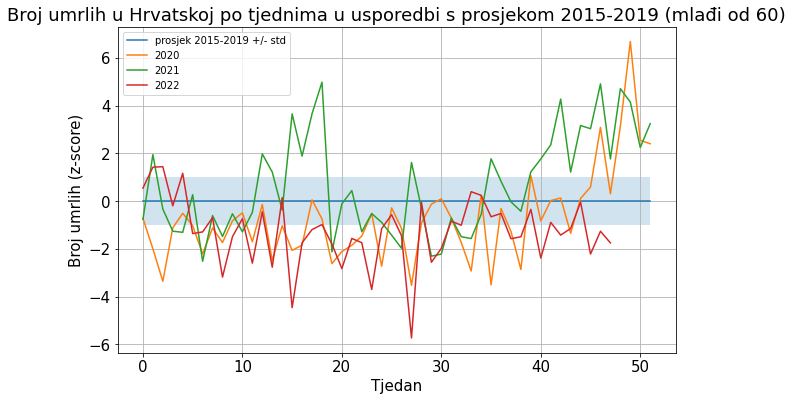

In [37]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(week_avgs - week_avgs, label='prosjek 2015-2019 +/- std')
ax.fill_between(range(len(week_avgs)), - week_stds / week_stds, week_stds / week_stds, alpha=0.2)

ax.plot((per_week_2020 - week_avgs) / week_stds, label='2020')
ax.plot((per_week_2021 - week_avgs) / week_stds, label='2021')
ax.plot((per_week_2022 - week_avgs[:len(per_week_2022)]) / week_stds[:len(per_week_2022)], label='2022')

ax.grid('on')

ax.set_ylabel('Broj umrlih (z-score)')
ax.set_xlabel('Tjedan')

ax.set_title('Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom 2015-2019 (mlađi od 60)')
ax.legend()

plt.savefig('img/cro_excess_under_60.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')

plt.show()

In [38]:
year_avg

5614.6

In [39]:
year_std

297.0014141380475

In [40]:
(total_2020 - year_avg) / year_std

-1.2949433291965293

In [41]:
(total_2021 - year_avg) / year_std

0.9104333754933456

<ipython-input-43-21439f933daa>:57: RuntimeWarning: invalid value encountered in true_divide
  stds = (week_stds / week_stds).tolist()
<ipython-input-43-21439f933daa>:65: RuntimeWarning: divide by zero encountered in true_divide
  axs[r, c].bar(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
<ipython-input-43-21439f933daa>:65: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].bar(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
<ipython-input-43-21439f933daa>:66: RuntimeWarning: divide by zero encountered in true_divide
  axs[r, c].bar(range(len(per_week_2020), len(per_week_2021) + len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
<ipython-input-43-21439f933daa>:66: RuntimeWarning: invalid value encountered in true_divide
  axs[r, c].bar(range(len(per_week_2020), len(per_week_2021) + len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
<ipython-input-43

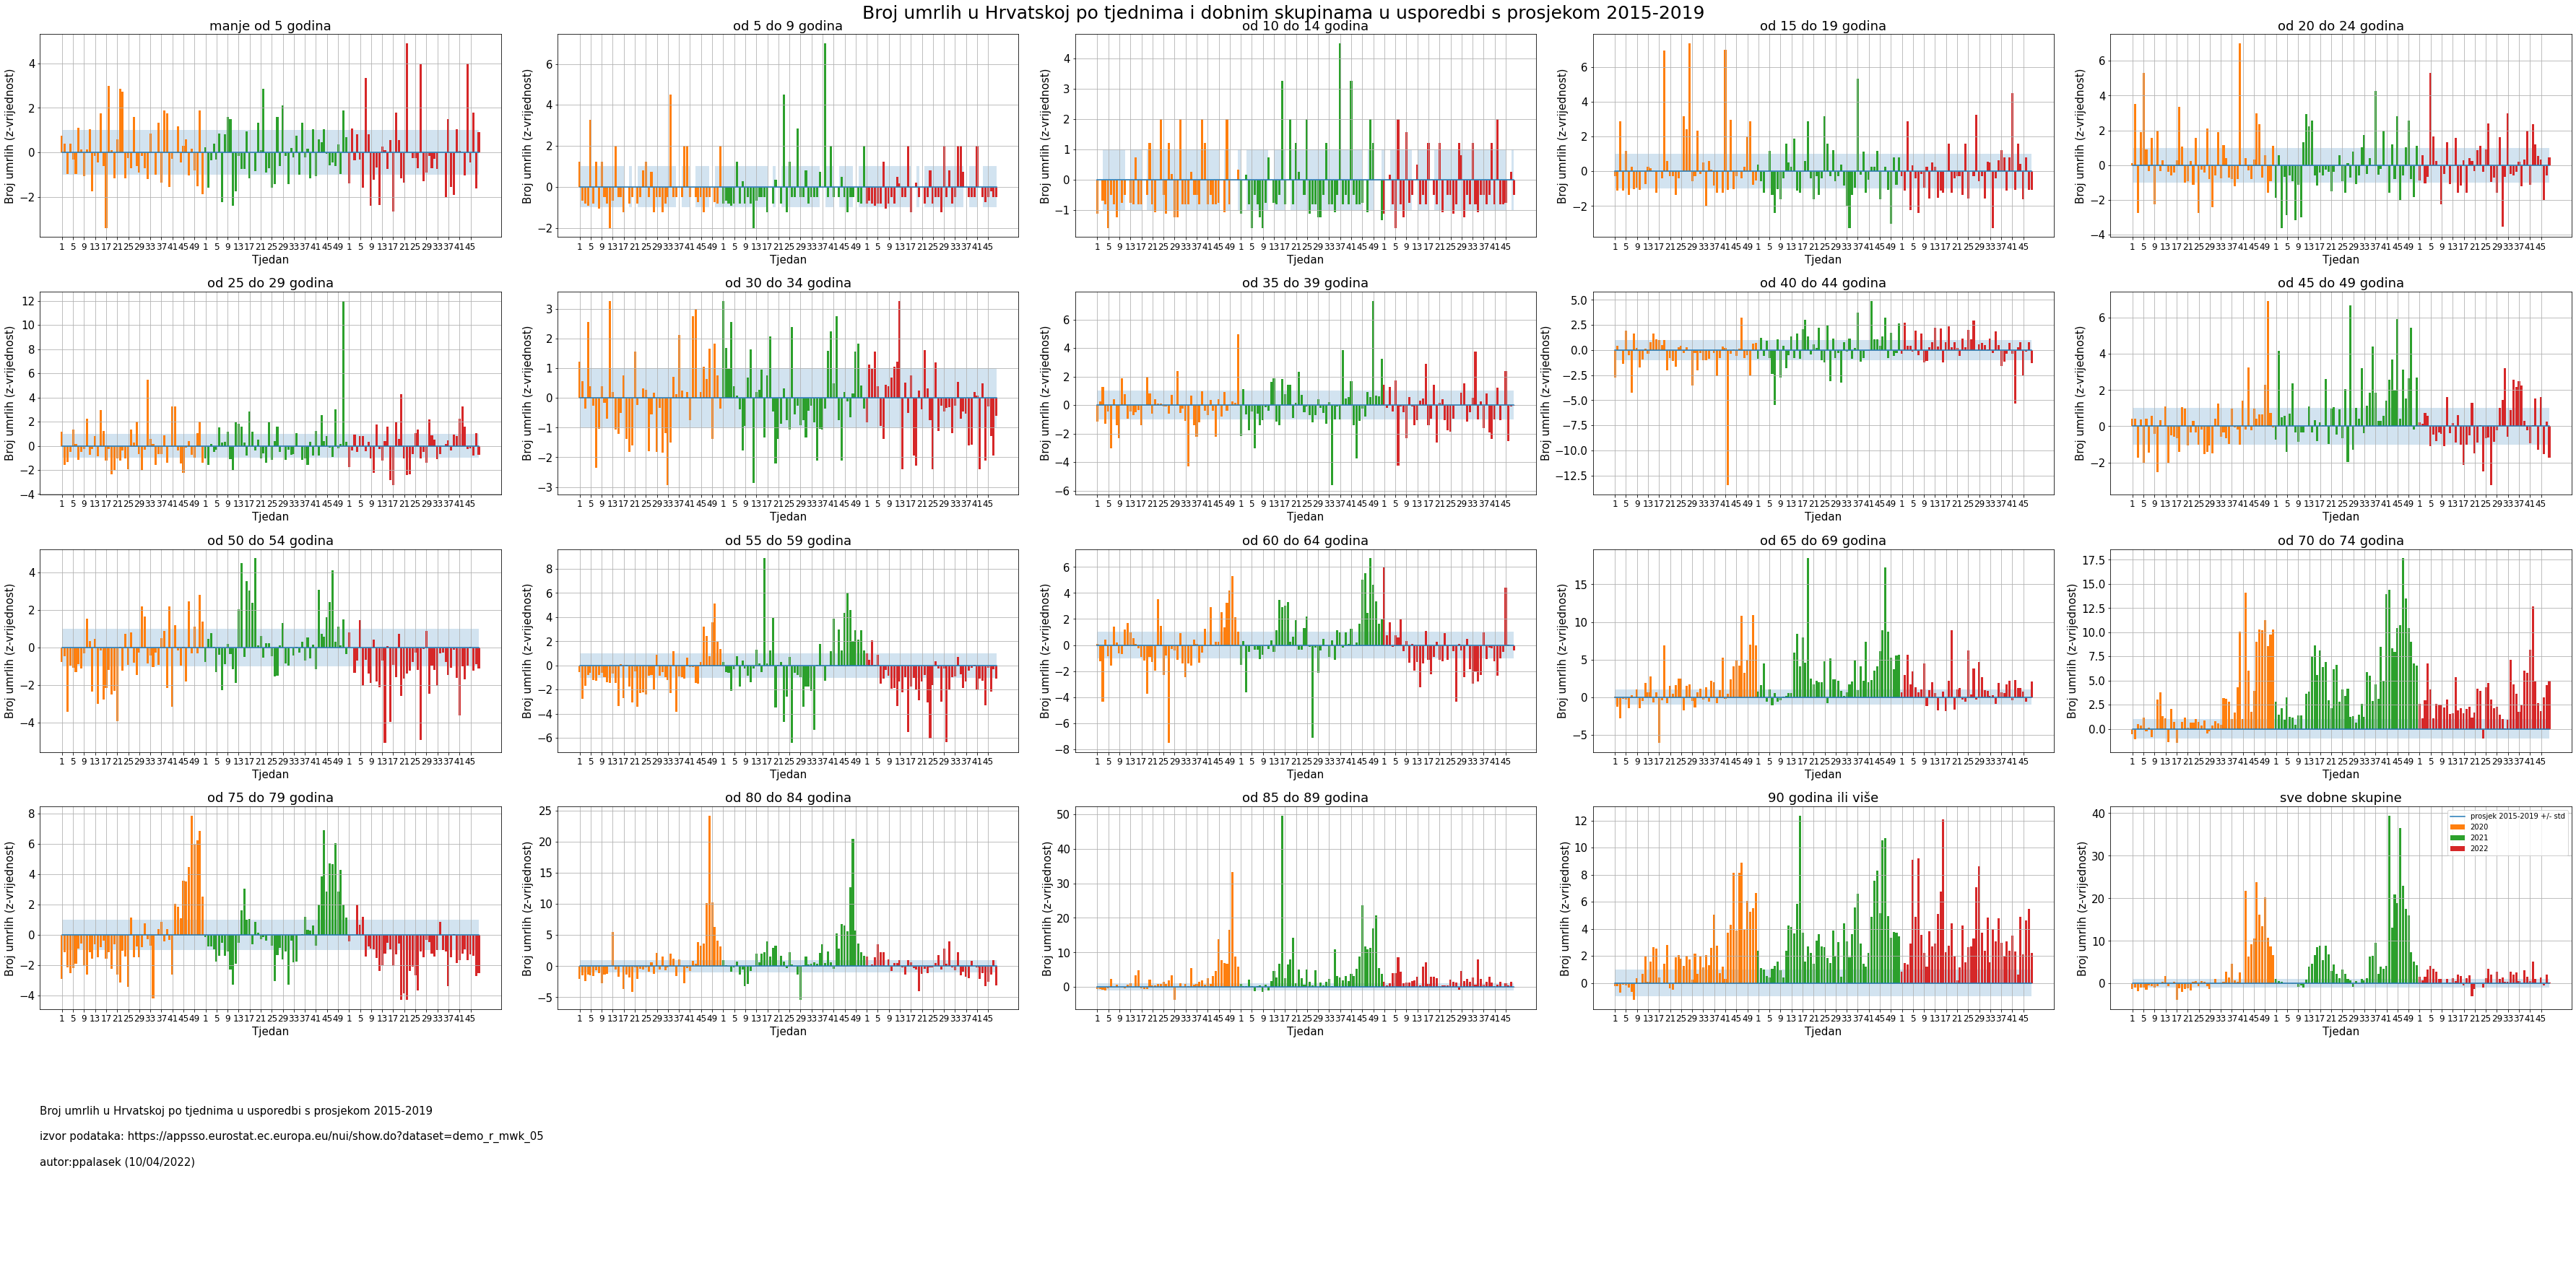

In [43]:
fig, axs = plt.subplots(5, 5, figsize=(50, 25))

gs = axs[4, 0].get_gridspec()

for i, age_group in enumerate(sorted_age_groups):
    r = i // 5
    c = i % 5
    
    age_group_hr = age_group.replace('From', 'od').replace('to', 'do').replace('years', 'godina').replace('or over', 'ili više').replace('Less than', 'manje od').replace('Total', 'sve dobne skupine')

    data_current_age = data[(data.AGE == age_group) & (data.SEX == 'Total')]
    
    data_current_age_2015_2019 = data_current_age[(data_current_age.TIME >= '2015W01') & (data_current_age.TIME < '2020W01')]
    
    data_current_age_2020 = data_current_age[(data_current_age.TIME >= '2020W01') & (data_current_age.TIME < '2021W01')]
    data_current_age_2021 = data_current_age[(data_current_age.TIME >= '2021W01') & (data_current_age.TIME < '2022W01')]
    data_current_age_2022 = data_current_age[(data_current_age.TIME >= '2022W01') & (data_current_age.TIME < '2023W01')]
    
    week_avgs = []
    week_stds = []

    for week in range(1, 53):
        current_week = data_current_age_2015_2019[data_current_age_2015_2019.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        current_vals = np.asarray([int(str(x).replace(',', '')) for x in current_week.Value.to_list()])

        week_avgs.append(current_vals.mean())
        week_stds.append(current_vals.std())

    week_avgs = np.asarray(week_avgs)
    week_stds = np.asarray(week_stds)
    
    
    
    
    
    per_week_2020 = []
    per_week_2021 = []
    per_week_2022 = []

    for week in range(1, 53):
        current_week_2020 = data_current_age_2020[data_current_age_2020.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2021 = data_current_age_2021[data_current_age_2021.TIME.str.contains('W{}'.format(str(week).zfill(2)))]
        current_week_2022 = data_current_age_2022[data_current_age_2022.TIME.str.contains('W{}'.format(str(week).zfill(2)))]

        per_week_2020.append(int(str(current_week_2020.Value.iat[0]).replace(',', '')))
        per_week_2021.append(int(str(current_week_2021.Value.iat[0]).replace(',', '')))

        try:
            per_week_2022.append(int(str(current_week_2022.Value.iat[0]).replace(',', '')))
        except:
            pass
    
    

    
    stds = (week_stds / week_stds).tolist()
    stds_rep = np.asarray(stds + stds + stds[:len(per_week_2022)])
    
    axs[r, c].plot([0] * len(stds_rep), label='prosjek 2015-2019 +/- std')

    
    axs[r, c].fill_between(range(len(stds_rep)), -stds_rep, stds_rep, alpha=0.2)

    axs[r, c].bar(range(len(per_week_2020)), (per_week_2020 - week_avgs) / week_stds, label='2020')
    axs[r, c].bar(range(len(per_week_2020), len(per_week_2021) + len(per_week_2021)), (per_week_2021 - week_avgs) / week_stds, label='2021')
    axs[r, c].bar(range(len(per_week_2020) + len(per_week_2021), len(per_week_2020) + len(per_week_2021) + len(per_week_2022)), (per_week_2022 - week_avgs[:len(per_week_2022)]) / week_stds[:len(per_week_2022)], label='2022')

    axs[r, c].grid('on')

    axs[r, c].set_ylabel('Broj umrlih (z-vrijednost)')
    axs[r, c].set_xlabel('Tjedan')
    

    axs[r, c].set_xticks(range(0, len(stds_rep), 4))
    axs[r, c].set_xticklabels(map(str, [x % 52 + 1 for x in range(0, len(stds_rep), 4)]), fontsize=12)
    
    
    axs[r, c].set_title(age_group_hr)
    
    
    
axs[r, c].legend()

# axs[r, c + 1].text(0., 0, 'Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom\n2015-2019\n\nizvor podataka:\nhttps://appsso.eurostat.ec.europa.eu/\nnui/show.do?dataset=demo_r_mwk_05\n\nautor:ppalasek (10/04/2022)')
# axs[r, c + 1].axis('off')

for ax in axs[-1, :]:
    ax.remove()
    
plt.suptitle('Broj umrlih u Hrvatskoj po tjednima i dobnim skupinama u usporedbi s prosjekom 2015-2019', fontsize=25)

ax_text = fig.add_subplot(gs[4, :])

ax_text.text(0, 0.5, 'Broj umrlih u Hrvatskoj po tjednima u usporedbi s prosjekom 2015-2019\n\nizvor podataka: https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=demo_r_mwk_05\n\nautor:ppalasek (10/04/2022)')
ax_text.axis('off')



plt.tight_layout()
plt.savefig('img/cro_excess_all_z_score.png', dpi=100, transparent=False, bbox_inches='tight', facecolor='white')


plt.show()

In [44]:
population = read_csv('data/population.csv')

In [45]:
population

,Group,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Less than 5 years,212.2,213.3,211.3,207.9,201.9,196.2,190.6,186.3,183.4,181.5,176.6,175.535
1,From 5 to 9 years,204.4,204.0,206.5,209.6,210.2,209.4,208.1,204.4,199.9,194.0,182.5,181.445
2,From 10 to 14 years,233.1,222.9,213.7,207.0,203.9,201.8,199.1,199.9,201.4,201.7,196.5,195.436
3,From 15 to 19 years,243.6,246.1,245.9,243.6,239.4,230.8,218.9,208.6,201.1,197.8,190.6,188.729
4,From 20 to 24 years,260.6,256.1,251.9,247.9,244.5,242.5,242.1,240.8,239.3,236.0,214.2,208.852
5,From 25 to 29 years,287.7,282.3,278.3,271.2,262.1,257.3,248.1,241.4,238.3,237.6,216.5,214.023
6,From 30 to 34 years,294.7,295.5,294.7,293.2,289.1,282.5,272.5,265.2,258.1,251.7,230.5,227.551
7,From 35 to 39 years,285.1,284.7,286.1,288.3,288.7,289.0,286.2,282.9,281.6,279.4,258.5,255.617
8,From 40 to 44 years,285.1,281.0,278.4,277.1,276.5,277.9,275.0,274.6,276.8,279.1,269.5,267.349
9,From 45 to 49 years,306.9,303.2,299.2,295.2,286.7,277.4,271.1,267.2,266.5,267.7,262.4,260.146
